In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
data = make_blobs(n_samples=300,
                 n_features=2,
                 centers=2,
                 cluster_std=1.0, random_state=101)

In [3]:
X,y = data

In [4]:
np.random.seed(seed=101)
z_noise=np.random.normal(size=len(X))

In [5]:
type(z_noise)

numpy.ndarray

In [6]:
z_noise = pd.Series(z_noise)

In [7]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [8]:
feat = pd.DataFrame(X)

In [9]:
feat = pd.concat([feat,z_noise],axis=1)

In [10]:
feat.columns = ['X1','X2','X3']

In [11]:
feat

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234


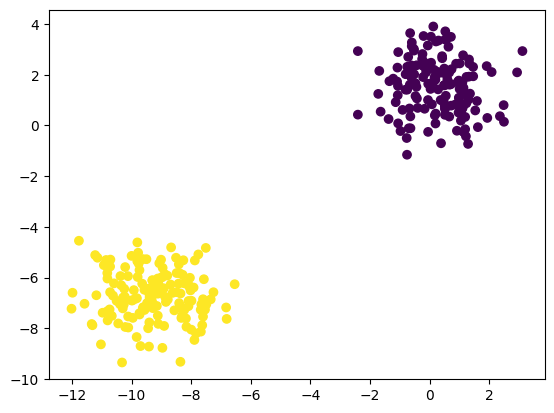

In [12]:
plt.scatter(feat['X1'],feat['X2'],c=y)

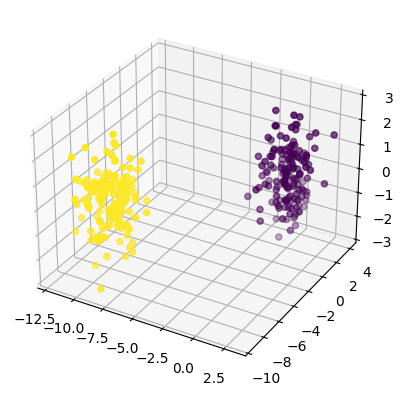

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [14]:
from mpl_toolkits.mplot3d import Axes3D

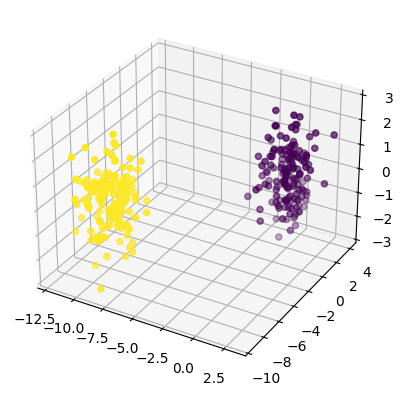

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [17]:
encoder=Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [18]:
decoder=Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [19]:
autoencoder=Sequential([encoder,decoder])
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(feat)

In [22]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 2ms/step - loss: 0.2525
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2428
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2395
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2369


In [23]:
encoded_2dim=encoder.predict(scaled_data)

10/10 [==============================] - 0s 1ms/step


In [24]:
encoded_2dim.shape

(300, 2)

In [25]:
scaled_data.shape

(300, 3)

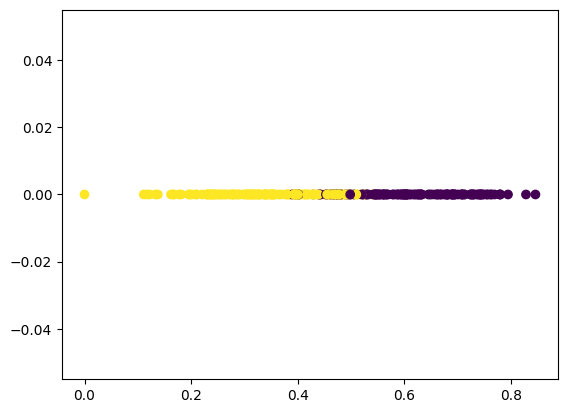

In [26]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)